# **BAB 1 - INTRODUCTION**

___
Nama : Ma'ruf Habibie Siregar  
Batch : HCK028  
Link Dashboard : [Link Dashboard](https://public.tableau.com/views/P0M1_Maruf_Habibie/DashboardTopMovie?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

Program ini dibuat untuk memberi rekomendasi film-film kepada platform streaming online dalam membeli atau menyewa film untuk ditayangkan di platformnya
___

# **BAB 2 - PROBLEM STATEMENT DAN DATASET DESCRIPTION**

## 2.1 Background  
Dalam beberapa tahun terakhir cara orang menikmati film sudah berubah. Kebanyakan orang tidak lagi menonton televisi ataupun pergi ke bioskop. Saat ini masyarakat lebih memilih layanan **streaming online**, karena dinilai **praktis** dan **flexsibel** serta dapat ditonton dan diakses kapanpun, dimanapun.

Untuk menciptakan platform streaming film diperlukan banyak analisa dalam berbagai aspek, mulai dari **UI/UX yang menarik dan mudah**, **preferensi pengguna**, dan **konten yang berkualiatas serta banyak peminatnya**. Dengan banyaknya platform streaming online sekarang ini, membuat begitu banyak **persaingan** yang menuntut hal-hal tersebut.

Maka dari itu dibutuhkan **analisa yang jelas dan akurat berdasarkan data**, agar film-film yang ditayangkan adalah film yang **berkualitas** dan **banyak peminatnya**. Sebaiknya diperlukan aspek yang pasti untuk menganalisanya seperti **komentar dan rating dari ahli film atau biasa disebut kritikus film**.

## 2.2 Topik Permasalahan  
Tantangan utama bagi penyedia platform online adalah bagaimana memilih **konten yang berkualitas dan diminati oleh penonton**.

## 2.1 Problem Statement  
Mengetahui **preferensi film penikmat dan kritikus film** untuk membantu platform streaming memilih film yang tepat untuk dibeli atau disewa.

**SMART**

* **Specific**   : Mencari tau preferensi film dari tahun **1989 sampai 2019** untuk membantu platform streaming online memilih film yang mau mereka sewa atau beli  
* **Measurable**  : Mengukur preferensi film berdasarkan :  
                    - Rata-rata rating kritikus dengan standard minimal rating **70/100** (standard rotten fresh) dengan minimal kritikus count di angka **50**.  
                    - Rata-rata rating audience dengan standard **70/100** dengan minimal audience count di angka **25.000** (Top IMDB 250)  
                    - **Top 5 genre**  
                    - Rata-rata rating audience dan kritikus berdasarkan nama **director**  
                    - Analisis popularitas serta kontribusi **cast utama (top 3 cast)** dan **popular cast** terhadap rating dan rekomendasi film.
  
* **Achievable**  : Dengan menganalisis dataset **Rotten_Tomatoes**, sebuah situs terpercaya yang dimana bukan hanya penonton saja yang aktif merating film tapi ada juga kritikus yang bisa jadi pembeda.    
* **Relevent**    : Kualitas film yang bagus dan bervariasi **memicu penonton untuk terus berlangganan** platform streaming tersebut  
* **Time-bound**  : Analisi dan Rekomendasi film akan diselesaikan dalam jangka waktu **3 hari**

Menganalisis preferensi film berdasarkan **rating kritikus, rating penonton, genre, director, dan cast** menggunakan dataset Rotten Tomatoes yang terpercaya akan dilakukan dalam jangka waktu 3 hari untuk memberikan rekomendasi yang membantu platform streaming online dalam memilih film yang tepat untuk disewa atau dibeli demi **meningkatkan kualitas konten dan mempertahankan pelanggan**.

## 2.4 Penjabaran Masalah  
- Apa film yang **kritikus rating dan audience ratingnya paling tinggi**?  
- Studio mana yang memproduksi paling banyak film yang dari tahun **1989 sampai 2019**?  
- Bagaimana **tren genre film** dari tahun 1989 sampai 2019?  
- Apakah nama **director mempengaruhi rating pentonton dan kritikus**? Dan Mengapa itu bisa terjadi  
- Siapa director yang memiliki **rata-rata rating filmnya paling tinggi**?  
- Berapa **rata-rata durasi film** dari tahun 1989 sampai 2019?  
- Apakah **durasi film mempengaruhi rating penonton**? Dan Mengapa itu bisa terjadi?  
- Siapa **cast utama yang paling populer** dan bagaimana pengaruhnya terhadap rating film?  
- Bagaimana **rekomendasi film yang tepat berdasarkan kombinasi data rating, director, dan cast populer**?

## 2.5 Dataset Description  

- **Deskripsi** : Dataset ini berisi tentang rating film dari website Rotten Tomatoes yang berisi **15.000 ++ data**. Yang didalamnya terdapat keterangan **judul film, info film, critic consensus, age rating, genre, date on theater, date on streaming, director, writer, cast, runtime in minutes, studio name, tomatometer status, tomatometer rating, tomatomater count, audience rating, dan audience count**  
- **Sumber** : Kaggle Database  
- **Link** : https://www.kaggle.com/datasets/subhajournal/movie-rating  


# **BAB 3 - DATA LOADING**

## 3.1 Import Package

Pada tahap ini saya akan mengimport **library-library** yang diperlukan dalam proyek ini

In [48]:
#Import Libraries yang diperlukan
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t, sem
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from scipy.stats import spearmanr
import openpyxl
import requests
import time

## 3.2 Loading Data Keseluruhan

Di tahap ini saya akan melakukan loading data, dimana data yang saya ambil berasal dari [kaggle](https://www.kaggle.com/datasets/subhajournal/movie-rating)

In [32]:
# Import file csv
df = pd.read_csv('Rotten Tomatoes Movies.csv')

pd.set_option('display.max_colwidth', 30)
#Show dataframe
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympi...,A teenager discovers he's ...,Though it may seem like ju...,PG,"Action & Adventure, Comedy...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. J...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind...,Nicole Holofcener's newest...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda P...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Du...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Ju...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry...,A Puerto Rican youth is on...,Sidney Lumet's feature deb...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedle...",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",This 1954 Disney version o...,One of Disney's finest liv...,G,"Action & Adventure, Drama,...",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas,...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


**Insight** :  
1. Dari data frame diatas bisa saya ambil kesimpulan ada nilai **NaN/Null di kolom critics_consensus**. Maka dari itu saya akan cek lebih lanjut  
2. Ada beberapa kolom yang bisa saya hapus karena tidak kita gunakan.  
  Kolomnya adalah  
    * **movie_info** : karena bersifat deskriptif, hanya menjelaskan tentang filmnya, dan itu tidak perlu digunakan untuk analisis rekomendasi film  
    * **critic_consensus** : banyak NaN, dan ini berisi opini dan tidak digunakan dalam analisis statistik  
    * **rating** : ini berisi tentang kategori rekomendasi umur penonton yang tidak perlu digunakan karena fokusnya disini adalah minat penonton secara umum  
    * **writers** : fokus kita pada **director**, jadi ini bisa dihapus. Director juga biasanya jauh relevan dibanding writer. Sutradara/director terkenal seperti **Christopher Nolan, Steven Spielberg, James Gunn, dll** biasa lebih sering jadi faktor penting dalam keputusan penonton menonton film tertentu.  
    * **on_streaming_date** : kita fokus pada **release year** saja untuk menyederhanakan yang berhubungan dengan "datetime"


## 3.3 Cek Info Data Frame

In [33]:
# Mengecek info dari data frame
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

Insight : 
1. Dari info data diatas bisa dilihat ada **1 kolom yang tipe datanya perlu kita ubah**, **dari object ke datetime** yaitu kolom **'on streaming date'**
2. Info di atas juga melihatkan beberapa **kolom yang ada value null** , maka dari itu saya perlu **menghandle missing valuenya** tapi dengan catatan saya harus** **memfilter film dari tahun  di 1989 sampai tahun 2019** terlebih dahulu


# **BAB 4 - DATA CLEANING**

## 4.1 Menghapus Kolom Yang Tidak Terpakai

In [34]:
# Menghapus kolom yang tidak mau di gunakan
df_v2 = df.drop(columns=['movie_info', 'critics_consensus', 'rating' , 'writers','on_streaming_date'])
# Mengecek apakah kolom yang ingin dihapus sudah terhapus
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   genre               16621 non-null  object 
 2   directors           16524 non-null  object 
 3   cast                16354 non-null  object 
 4   in_theaters_date    15823 non-null  object 
 5   runtime_in_minutes  16483 non-null  float64
 6   studio_name         16222 non-null  object 
 7   tomatometer_status  16638 non-null  object 
 8   tomatometer_rating  16638 non-null  int64  
 9   tomatometer_count   16638 non-null  int64  
 10  audience_rating     16386 non-null  float64
 11  audience_count      16386 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.5+ MB


Insight :  
Bisa dilihat dari info dataframe di atas bahwa **kolom-kolom yang tidak ingin saya pakai sudah terhapus**.

## 4.2 Mengubah Tipe Data

In [35]:
#Mengubah tipe data kolom "in_theaters_date"
df_v2['in_theaters_date'] = pd.to_datetime(df_v2['in_theaters_date'], errors='coerce')
#Mengecek apakah tipe data sudah berubah
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   genre               16621 non-null  object        
 2   directors           16524 non-null  object        
 3   cast                16354 non-null  object        
 4   in_theaters_date    15823 non-null  datetime64[ns]
 5   runtime_in_minutes  16483 non-null  float64       
 6   studio_name         16222 non-null  object        
 7   tomatometer_status  16638 non-null  object        
 8   tomatometer_rating  16638 non-null  int64         
 9   tomatometer_count   16638 non-null  int64         
 10  audience_rating     16386 non-null  float64       
 11  audience_count      16386 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 1.5+ MB


Insight :  
Dari info dataframe di atas, tipe data kolom in_theaters_date **telah berubah** dari **"object"** menjadi **"datetime"**

## 4.3 Mem-filter Film berdasarkan tahun streaming di 1999 sampai 2019

Sebelum melakukan filter tahun, saya akan mengextract dahulu tahun dari kolom 'in_theaters_date'

In [36]:
# Mengextract tahun dari release year
df_v2['release_year'] = df_v2['in_theaters_date'].dt.year
# Melihat hasil extract
df_v2.head(5)

,movie_title,genre,directors,cast,in_theaters_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
0,Percy Jackson & the Olympi...,"Action & Adventure, Comedy...",Chris Columbus,"Logan Lerman, Brandon T. J...",2010-02-12,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0,2010.0
1,Please Give,Comedy,Nicole Holofcener,"Catherine Keener, Amanda P...",2010-04-30,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0,2010.0
2,10,"Comedy, Romance",Blake Edwards,"Dudley Moore, Bo Derek, Ju...",1979-10-05,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0,1979.0
3,12 Angry Men (Twelve Angry...,"Classics, Drama",Sidney Lumet,"Martin Balsam, John Fiedle...",1957-04-13,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0,1957.0
4,"20,000 Leagues Under The Sea","Action & Adventure, Drama,...",Richard Fleischer,"James Mason, Kirk Douglas,...",1954-01-01,127.0,Disney,Fresh,89,27,74.0,68860.0,1954.0


Insight :  
kolom release_year sudah dibuat  

Setelah kolom release_year telah dibuat saya akan melakukan pengecekan missing value dahulu sebelum memfilter tahunnya dari tahun 1989 - 2019.

In [37]:
#Mengecek Naan Value di release_year
missing_ry = df_v2[df_v2['release_year'].isnull()]
missing_ry

,movie_title,genre,directors,cast,in_theaters_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
58,All Quiet on the Western F...,Drama,Delbert Mann,"Richard Thomas, Ernest Bor...",NaT,150.0,Unknown,Fresh,100,5,70.0,7571.0,NaN
71,The Silence,"Action & Adventure, Drama,...",Cate Shortland,"Richard Roxburgh, Essie Da...",NaT,104.0,NaN,Rotten,50,6,38.0,374.0,NaN
156,The Broken,"Horror, Mystery & Suspense",Sean Ellis (II),"Lena Headey, Richard Jenki...",NaT,88.0,After Dark Films,Rotten,49,39,25.0,2543.0,NaN
264,Three Blind Mice,"Comedy, Drama",Matthew Newton,"Matthew Newton, Toby Schmi...",NaT,93.0,IFC Films,Fresh,80,5,50.0,229.0,NaN
292,Avenging Angel,"Action & Adventure, Drama,...",Robert Vincent O'Neil,"Betsy Russell, Rory Calhou...",NaT,94.0,Starmaker Entertainment,Rotten,33,6,26.0,1541.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16552,You Got Served: Beat The W...,Drama,Robert Adetuyi,"Tyrone Brown, Mishael Morg...",NaT,91.0,Sony Pictures Home Enterta...,Rotten,0,5,20.0,373.0,NaN
16555,You Might Be the Killer,Horror,Brett A. Simmons,"Fran Kranz, Alyson Hanniga...",NaT,88.0,Curmudgeon Films,Rotten,59,17,54.0,106.0,NaN
16584,Your Son (Tu Hijo),Drama,Miguel Ángel Vivas,"José Coronado, Ana Wagener...",NaT,NaN,Netflix,Fresh,100,5,57.0,45.0,NaN
16601,Zambezia,"Animation, Comedy",Wayne Thornley,"Abigail Breslin, Jeff Gold...",NaT,84.0,Sony Pictures Home Enterta...,Rotten,25,8,43.0,755.0,NaN


Insight :  
- Saya dapatkan ada 815 baris yang terdapat missing value
- Saya akan mengisi missing value tersebut menggunakan interpolate dengan alasan
    * Biar ngk banyak value ya sama
    * Cuma sekitar 4% dari keseluruhan data tapi tetap saya tidak mau ada informasi yang hlang kalau di drop dan tidak mau ada yang bias kalau menggunakan median

In [38]:
# Mengisi NaN value di kolom release_year dengan metode interpolate
df_v2['release_year'] = df_v2['release_year'].fillna(df_v2['release_year'].interpolate())
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   genre               16621 non-null  object        
 2   directors           16524 non-null  object        
 3   cast                16354 non-null  object        
 4   in_theaters_date    15823 non-null  datetime64[ns]
 5   runtime_in_minutes  16483 non-null  float64       
 6   studio_name         16222 non-null  object        
 7   tomatometer_status  16638 non-null  object        
 8   tomatometer_rating  16638 non-null  int64         
 9   tomatometer_count   16638 non-null  int64         
 10  audience_rating     16386 non-null  float64       
 11  audience_count      16386 non-null  float64       
 12  release_year        16638 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), ob

Insight :  
Bisa terlihat dari info dataframe diatas bahwa kolom 'release_year' sudah tidak ada missing value.

Setelah peng-inputan missing value pada kolom release_year selesai maka saya akan memfilter tahun release dari 1989 ke 2019 serta saya akan menghapus kolom 'in_theater_date' karena sudah ada kolom 'release_year' yang mewakili.

In [39]:
#Memfilter tahun dengan ketentuan dari tahun 1989 - 2019
df_v3 = df_v2[(df_v2['release_year'] >= 1989) & (df_v2['release_year'] <= 2019)]

# Mengecek apakah tahunnya sudah dari tahun 1989 sampai 2019
min_year = df_v3['release_year'].min()
max_year = df_v3['release_year'].max()
print(f"Tahun release sudah dari {int(min_year)} sampai {int(max_year)}")

Tahun release sudah dari 1989 sampai 2019


Insight :  
Tahun telah di filter dengan ketentuan tahun release dari 1989 sampai 2019.  

In [40]:
# Menghapus kolom in_theater_date
df_v3 = df_v3.drop(columns=['in_theaters_date'])

#Cek apakah kolom in_theater_date sudah terhapus
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13210 entries, 0 to 16634
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         13210 non-null  object 
 1   genre               13194 non-null  object 
 2   directors           13106 non-null  object 
 3   cast                12936 non-null  object 
 4   runtime_in_minutes  13060 non-null  float64
 5   studio_name         12876 non-null  object 
 6   tomatometer_status  13210 non-null  object 
 7   tomatometer_rating  13210 non-null  int64  
 8   tomatometer_count   13210 non-null  int64  
 9   audience_rating     12980 non-null  float64
 10  audience_count      12980 non-null  float64
 11  release_year        13210 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.3+ MB


Insight :  
Kolom in_theaters_date telah terhapus

## 4.4 Handle Missing Values

Pada tahap ini saya akan melakukan handling pada missing value di beberapa kolom. Sebelum itu saya akan mengecek kolom mana yang ada missing value-nya.

In [41]:
#Mengecek kolom-kolom yang terdapat Missing Value
df_v3.isnull().sum()

movie_title             0
genre                  16
directors             104
cast                  274
runtime_in_minutes    150
studio_name           334
tomatometer_status      0
tomatometer_rating      0
tomatometer_count       0
audience_rating       230
audience_count        230
release_year            0
dtype: int64

Insight :  
- Dari info data frame di atas saya dapatkan bahwa ada missing value di beberapa kolom, yaitu :
    * genre = 16 baris
    * directors = 104 baris
    * cast = 274 baris
    * runtime_in_minutes = 150 baris
    * studio_name = 334 baris
    * audience_rating = 230 baris
    * audience_count = 230 baris

### 4.4.1 Handle Missing Value pada Genre

Pada tahap ini saya akan melakukan handling missing value pada kolom genre. Saya akan melakukan input perbaris karena cuma ada 16 baris yang missing. Saya akan mencari judul film tersebut secara manual dan melihat genre serta menginputnya. Saya mencarinya di dalam website Rotten Tomatoes itu sendiri.

In [43]:
#Cek nama film
missing_genre_rows = df_v3[df_v3['genre'].isnull()]
missing_genre_rows

,movie_title,genre,directors,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
1927,400 Days,NaN,Matt Osterman,"Brandon Routh, Caity Lotz,...",91.0,New Artists Alliance,Rotten,22,9,41.0,2108.0,2016.000000
2449,All the Way,NaN,Jay Roach,"Bryan Cranston, Anthony Ma...",132.0,Amblin Television,Certified Fresh,88,33,83.0,2822.0,2016.000000
3088,Batman: Hush,NaN,Justin Copeland,"Jason O'Mara, Bruce Thomas...",81.0,NaN,Fresh,88,17,67.0,6.0,2000.500000
3091,Batman: Return Of The Cape...,NaN,Rick Morales,"Steven Weber, Adam West, B...",72.0,Warner Bros. Animation,Fresh,94,18,67.0,474.0,2002.500000
3100,Batman vs. Two-Face,NaN,Rick Morales,"Adam West, Burt Ward, Will...",72.0,DC Entertainment,Fresh,100,8,60.0,174.0,2005.800000
5125,Descendants 2,NaN,Kenny Ortega,"Sofia Carson, Booboo Stewa...",30.0,NaN,Fresh,67,6,72.0,832.0,1990.500000
8121,Jane Wants a Boyfriend,NaN,William Sullivan,"Louisa Krause, Eliza Dushk...",101.0,Copperline Creative,Rotten,29,7,63.0,234.0,2016.000000
8359,Justice League vs the Fata...,NaN,Sam Liu,"Elyes Gabel, Diane Guerrer...",87.0,Warner Bros,Fresh,100,8,65.0,40.0,2013.571429
9197,Lost in the Sun,NaN,Trey Nelson,"Josh Duhamel, Josh Wiggins...",95.0,Floren Shieh Productions,Rotten,20,10,37.0,266.0,2015.000000
9509,Manson Family Vacation,NaN,J. Davis,"Jay Duplass, Linas Phillip...",84.0,Logolite Entertainment,Fresh,100,14,56.0,426.0,2005.000000


In [45]:
#Mengisi NaN value pada genre dengan input manual

genre_correction = {
    "400 Days": "Drama, Sci-Fi",
    "All the Way": "Drama, History",
    "Batman: Hush": "Animation, Action",
    "Batman: Return Of The Caped Crusaders": "Animation, Action, Comedy",
    "Batman vs. Two-Face": "Animation, Action, Crime",
    "Descendants 2": "Family, Fantasy, Musical",
    "Jane Wants a Boyfriend": "Romance, Drama, Comedy",
    "Justice League vs the Fatal Five": "Animation, Action, Adventure",
    "Lost in the Sun": "Drama, Thriller",
    "Manson Family Vacation": "Comedy, Drama",
    "Pokémon The Movie: I Choose You!": "Animation, Action, Adventure",
    "Suicide Squad: Hell to Pay": "Animation, Action, Crime",
    "The Death of Superman": "Animation, Action, Drama",
    "The Debt Collector": "Action, Crime, Drama",
    "The Jurassic Games": "Action, Sci-Fi, Thriller",
    "Wonder Woman: Bloodlines": "Animation, Action, Adventure",
}

for i, row in df_v3.iterrows():
    if pd.isnull(row['genre']):
        movie = row['movie_title']
        if movie in genre_correction:
            df_v3.at[i, 'genre'] = genre_correction[movie]

In [46]:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13210 entries, 0 to 16634
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         13210 non-null  object 
 1   genre               13210 non-null  object 
 2   directors           13106 non-null  object 
 3   cast                12936 non-null  object 
 4   runtime_in_minutes  13060 non-null  float64
 5   studio_name         12876 non-null  object 
 6   tomatometer_status  13210 non-null  object 
 7   tomatometer_rating  13210 non-null  int64  
 8   tomatometer_count   13210 non-null  int64  
 9   audience_rating     12980 non-null  float64
 10  audience_count      12980 non-null  float64
 11  release_year        13210 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB


Insight : 
Missing value pada genre telah di handle

### 4.4.2. Handle Missing Value pada kolom directors

In [47]:
'''Handle Missing Value pada directors'''
missing_dir = df_v3[df_v3['directors'].isna()]
display(missing_dir)

,movie_title,genre,directors,cast,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
210,My Sister's Keeper,Drama,NaN,NaN,110.0,Warner Bros. Pictures,Rotten,48,136,72.0,365325.0,2009.0
929,Cliffhanger,Action & Adventure,NaN,NaN,113.0,Sony Pictures Home Enterta...,Fresh,68,53,52.0,182855.0,1993.0
1129,The Peacemaker,Action & Adventure,NaN,NaN,124.0,Dreamworks,Rotten,39,33,39.0,45594.0,1997.0
1380,Suicide Club,"Art House & International,...",NaN,"Ryo Ishibashi, Akaji Maro,...",95.0,TLA Releasing,Rotten,57,7,69.0,18354.0,2002.0
2219,The Accidental Spy (Te wu ...,"Action & Adventure, Art Ho...",NaN,Kim Min Jeong,108.0,Miramax,Rotten,29,7,36.0,10879.0,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15836,Venus And Serena,"Documentary, Special Interest",NaN,"Venus Williams, Serena Wil...",99.0,Magnolia Pictures,Fresh,77,31,69.0,2070.0,2013.0
16047,We Are Boats,"Drama, Science Fiction & F...",NaN,"Angela Sarafyan, Adriana M...",108.0,NaN,Rotten,50,6,62.0,8.0,2019.0
16394,Without Name,"Art House & International,...",NaN,"Niamh Algar, Alan Mckenna,...",93.0,NaN,Fresh,81,16,33.0,38.0,2003.0
16429,Wonder Park,"Animation, Comedy, Kids & ...",NaN,"Jennifer Garner, Matthew B...",86.0,Paramount Animation,Rotten,33,102,45.0,555.0,2019.0


Saya akan melakukan input missing director dengan API dari OMDb, dimana OMDb akan melakukan pencarian berdasarkan judul film yang ada di dataset saya. Dengan menggunakan API key yang sudah aktif, saya akan mengirim permintaan ke OMDb untuk setiap baris data yang kolom directors-nya kosong. Setelah mendapatkan data director dari API, saya akan mengupdate nilai tersebut ke dataframe agar data menjadi lebih lengkap dan akurat.


In [49]:
API_KEY = "dd321eeb"  # API key OMDb yang sudah kamu aktifkan

def get_director_from_omdb(title):
    url = f"http://www.omdbapi.com/?apikey={API_KEY}&t={requests.utils.quote(title)}"
    try:
        response = requests.get(url)
        data = response.json()
        if data['Response'] == 'True' and 'Director' in data:
            director = data['Director']
            if director != "N/A":
                return director
        return None
    except Exception as e:
        print(f"Error fetching data for {title}: {e}")
        return None

# Loop untuk update kolom 'directors' yang kosong
for idx, row in df_v3.iterrows():
    if pd.isnull(row['directors']):
        movie_title = row['movie_title']
        director_name = get_director_from_omdb(movie_title)
        if director_name:
            df_v3.at[idx, 'directors'] = director_name
            print(f"Updated director for '{movie_title}': {director_name}")
        else:
            print(f"Director not found for '{movie_title}'")
        time.sleep(0.1)  # Delay agar tidak kena rate limit

print(f"Jumlah missing directors setelah update: {df_v3['directors'].isnull().sum()}")


Updated director for 'My Sister's Keeper': Nick Cassavetes
Updated director for 'Cliffhanger': Renny Harlin
Updated director for 'The Peacemaker': Mimi Leder
Updated director for 'Suicide Club': Sion Sono
Director not found for 'The Accidental Spy (Te wu mi cheng)'
Updated director for 'Adam Sandler: 100% Fresh': Steven Brill, Nicholaus Goossen
Updated director for 'Afghan Cycles': Sarah Menzies
Director not found for 'Alps (Alpeis)'
Updated director for 'Amazing Grace': Michael Apted
Updated director for 'An Interview With God': Perry Lang
Updated director for 'Augustine': Alice Winocour
Updated director for 'The Babysitters': David Ross
Updated director for 'Barfi!': Anurag Basu
Updated director for 'Battlefield America': Chris Stokes
Updated director for 'Be Natural: The Untold Story of Alice Guy-Blaché': Pamela B. Green
Updated director for 'Between Worlds': Maria Pulera
Updated director for 'Bill Burr: Paper Tiger': Mike Binder
Updated director for 'The Blood of Heroes': David Web

Insight : 
Ada 9 Missing Value ada directors yang datanya tidak ada di OMBD, maka dari itu saya akan handle sisanya dengan inputan "Unknown"

In [52]:
#Input sisa missing value pada director dengan "Unknown"
df_v3['directors'] = df_v3['directors'].fillna('Unknown')

#cek kolom director, apakah missing value masih ada
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13210 entries, 0 to 16634
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         13210 non-null  object 
 1   genre               13210 non-null  object 
 2   directors           13210 non-null  object 
 3   cast                12936 non-null  object 
 4   runtime_in_minutes  13060 non-null  float64
 5   studio_name         12876 non-null  object 
 6   tomatometer_status  13210 non-null  object 
 7   tomatometer_rating  13210 non-null  int64  
 8   tomatometer_count   13210 non-null  int64  
 9   audience_rating     12980 non-null  float64
 10  audience_count      12980 non-null  float64
 11  release_year        13210 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB


### 4.4.3 Handle Missing Value pada runtime_in_minutes

In [830]:
'''Handle Missing Value pada runtime_in_minutes'''
missing_rim = df_v3[df_v3['runtime_in_minutes'].isna()]
jumlah_missing_rim=  df_v3['runtime_in_minutes'].isna().sum()

display(missing_rim)
print(f"Jumlah values missing di runtime_in_minutes: {jumlah_missing_rim}")

,movie_title,genre,directors,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
215,Prima Ballerina,"Art House & International, Special Interest",Laurent Gentot,NaN,First Run Features,Fresh,81,26,100.0,24.0,2009.0
1818,12 Strong,"Action & Adventure, Drama",Nicolai Fuglsig,NaN,Warner Bros. Pictures,Rotten,51,166,62.0,5067.0,2018.0
2007,A Bad Moms Christmas,Comedy,Jon Lucas,NaN,STXfilms,Rotten,31,127,44.0,13153.0,2017.0
2056,A Futile and Stupid Gesture,Comedy,David Wain,NaN,Netflix,Fresh,67,43,72.0,516.0,2012.5
2216,Accident Man,"Action & Adventure, Mystery & Suspense",Jesse V. Johnson,NaN,Six Demon Films,Fresh,100,5,68.0,190.0,2007.5
...,...,...,...,...,...,...,...,...,...,...,...
15658,Unbroken: Path to Redemption,Drama,Harold Cronk,NaN,Pure Flix,Rotten,38,26,78.0,369.0,2018.0
15870,Victoria & Abdul,Drama,Stephen Frears,NaN,Focus Features,Fresh,66,192,67.0,9487.0,2017.0
15995,War Machine,"Action & Adventure, Comedy",David Michôd,NaN,Netflix,Rotten,48,91,34.0,5443.0,2017.0
16347,Winchester,"Drama, Mystery & Suspense, Science Fiction & F...","Michael Spierig, Peter Spierig",NaN,CBS Films,Rotten,14,124,32.0,2708.0,2018.0


Jumlah values missing di runtime_in_minutes: 150


Insight : Dari yang kita dapatkan bahwa hanya ada 1 % missing value di runtime_in_minutes maka dari itu kita bisa menggunakan median, karena median tahan terhadap outlier

In [831]:
''' Mengisi value kosong pada runtime_in_minutes dengan mengambil nilai tengah'''
df_v3['runtime_in_minutes'] = df_v3['runtime_in_minutes'].fillna(df_v3['runtime_in_minutes'].median())
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13210 entries, 0 to 16634
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         13210 non-null  object 
 1   genre               13210 non-null  object 
 2   directors           13210 non-null  object 
 3   runtime_in_minutes  13210 non-null  float64
 4   studio_name         12876 non-null  object 
 5   tomatometer_status  13210 non-null  object 
 6   tomatometer_rating  13210 non-null  int64  
 7   tomatometer_count   13210 non-null  int64  
 8   audience_rating     12980 non-null  float64
 9   audience_count      12980 non-null  float64
 10  release_year        13210 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1.2+ MB


Insight : Handle missing values pada runtime_in_minutes selesai

### 4.4.4 Handle Missing Value pada studio_name

In [832]:
'''Handle Missing Value pada studio_name'''
missing_stn = df_v3[df_v3['studio_name'].isna()]
jumlah_missing_stn=  df_v3['studio_name'].isna().sum()

display(missing_stn)
print(f"Jumlah missing value di studio_name: {jumlah_missing_stn}")

,movie_title,genre,directors,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
27,A Tale of Two Pizzas,Comedy,Vincent Sassone,82.0,NaN,Rotten,38,8,NaN,NaN,2003.0
66,Gui si (Silk),"Art House & International, Horror, Mystery & S...",Chao-Bin Su,117.0,NaN,Rotten,40,5,58.0,2530.0,2006.0
68,The 4th Dimension,"Drama, Science Fiction & Fantasy","Tom Mattera, Dave Mazzoni",82.0,NaN,Fresh,63,8,31.0,394.0,2006.0
71,The Silence,"Action & Adventure, Drama, Mystery & Suspense,...",Cate Shortland,104.0,NaN,Rotten,50,6,38.0,374.0,2006.5
135,Guta-yubalja-deul (A Bloody Aria),"Art House & International, Drama, Mystery & Su...",Shin-yeon Won,115.0,NaN,Rotten,42,24,40.0,297.0,2006.0
...,...,...,...,...,...,...,...,...,...,...,...
16394,Without Name,"Art House & International, Drama, Mystery & Su...",Unknown,93.0,NaN,Fresh,81,16,33.0,38.0,2003.0
16433,Wonder Woman: Bloodlines,Unknown,"Justin Copeland, Sam Liu",83.0,NaN,Fresh,88,8,77.0,13.0,2007.5
16474,Wrecker,Horror,Micheal Bafaro,83.0,NaN,Rotten,0,6,13.0,165.0,2015.0
16476,Wrinkles the Clown,"Comedy, Documentary, Horror",Michael Beach Nichols,78.0,NaN,Fresh,67,27,NaN,NaN,2019.0


Jumlah missing value di studio_name: 334


Insight : Ada sekitar 2 % missing value pada studio_name dari data keseluruhan dan itu terbilang masih rendah. Maka kita bisa handle dengan mengganti missing value dengan Unknown

In [833]:
'''Mengisi missing values pada studio_name dengan Unknown'''
df_v3['studio_name'] = df_v3['studio_name'].fillna('Unknown')

df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13210 entries, 0 to 16634
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         13210 non-null  object 
 1   genre               13210 non-null  object 
 2   directors           13210 non-null  object 
 3   runtime_in_minutes  13210 non-null  float64
 4   studio_name         13210 non-null  object 
 5   tomatometer_status  13210 non-null  object 
 6   tomatometer_rating  13210 non-null  int64  
 7   tomatometer_count   13210 non-null  int64  
 8   audience_rating     12980 non-null  float64
 9   audience_count      12980 non-null  float64
 10  release_year        13210 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1.2+ MB


Insight : Missing Value pada studio_name telah di handle

### 4.4.5 Handle Missing Value pada audience_rating

In [834]:
'''Handle Missing Value pada audience_rating'''
missing_art = df_v3[df_v3['audience_rating'].isna()]
jumlah_missing_art=  df_v3['audience_rating'].isna().sum()

display(missing_art)
print(f"Jumlah missing value di audience_rating: {jumlah_missing_art}")

,movie_title,genre,directors,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
27,A Tale of Two Pizzas,Comedy,Vincent Sassone,82.0,Unknown,Rotten,38,8,NaN,NaN,2003.0
75,Snow Blind,"Documentary, Sports & Fitness",Christopher J. Scott,92.0,Matson Films,Rotten,20,5,NaN,NaN,2006.0
188,Ripple Effect,Drama,Philippe Caland,82.0,Monterey Media,Rotten,29,7,NaN,NaN,2008.0
1127,The Keeper,"Drama, Mystery & Suspense",Joe Brewster,90.0,Rada Films,Rotten,17,6,NaN,NaN,1997.0
1301,Hamlet,"Drama, Television","Campbell Scott, Eric Simonson",178.0,Hallmark Entertainment,Fresh,71,7,NaN,NaN,2000.0
...,...,...,...,...,...,...,...,...,...,...,...
16470,Wounds,"Drama, Horror, Mystery & Suspense",Babak Anvari,101.0,Hulu,Rotten,53,45,NaN,NaN,2019.0
16476,Wrinkles the Clown,"Comedy, Documentary, Horror",Michael Beach Nichols,78.0,Unknown,Fresh,67,27,NaN,NaN,2019.0
16539,Yom Yom,"Art House & International, Comedy, Drama",Amos Gitai,106.0,Cinema Factory,Rotten,50,6,NaN,NaN,2001.0
16541,Yosemite,Drama,Gabrielle Demeestere,82.0,Unknown,Fresh,77,13,NaN,NaN,2016.0


Jumlah missing value di audience_rating: 230


Insight : Bisa dilihat ada 242 missing value pada audience_rating maka dan itu juga sekitar 1 % dari total keseluruhan data. Saya akan coba menggunakan interpolate supaya tidak banyak value yang double

In [835]:
''' Mengisi value kosong pada audience_rating dengan mengambil nilai tengah'''
df_v3['audience_rating'] = df_v3['audience_rating'].fillna(df_v3['audience_rating'].interpolate())
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13210 entries, 0 to 16634
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         13210 non-null  object 
 1   genre               13210 non-null  object 
 2   directors           13210 non-null  object 
 3   runtime_in_minutes  13210 non-null  float64
 4   studio_name         13210 non-null  object 
 5   tomatometer_status  13210 non-null  object 
 6   tomatometer_rating  13210 non-null  int64  
 7   tomatometer_count   13210 non-null  int64  
 8   audience_rating     13210 non-null  float64
 9   audience_count      12980 non-null  float64
 10  release_year        13210 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1.2+ MB


Insight : Missing Values di audience rating telah di handle

### 4.4.6 Handle Missing Value pada audience_count

In [836]:
'''Handle Missing Value pada audience_count'''
missing_act= df_v3[df_v3['audience_count'].isna()]
jumlah_missing_act=  df_v3['audience_count'].isna().sum()

display(missing_act)
print(f"Jumlah missing value di audience_count: {jumlah_missing_act}")

,movie_title,genre,directors,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
27,A Tale of Two Pizzas,Comedy,Vincent Sassone,82.0,Unknown,Rotten,38,8,79.5,NaN,2003.0
75,Snow Blind,"Documentary, Sports & Fitness",Christopher J. Scott,92.0,Matson Films,Rotten,20,5,59.5,NaN,2006.0
188,Ripple Effect,Drama,Philippe Caland,82.0,Monterey Media,Rotten,29,7,55.5,NaN,2008.0
1127,The Keeper,"Drama, Mystery & Suspense",Joe Brewster,90.0,Rada Films,Rotten,17,6,50.5,NaN,1997.0
1301,Hamlet,"Drama, Television","Campbell Scott, Eric Simonson",178.0,Hallmark Entertainment,Fresh,71,7,67.5,NaN,2000.0
...,...,...,...,...,...,...,...,...,...,...,...
16470,Wounds,"Drama, Horror, Mystery & Suspense",Babak Anvari,101.0,Hulu,Rotten,53,45,61.0,NaN,2019.0
16476,Wrinkles the Clown,"Comedy, Documentary, Horror",Michael Beach Nichols,78.0,Unknown,Fresh,67,27,81.0,NaN,2019.0
16539,Yom Yom,"Art House & International, Comedy, Drama",Amos Gitai,106.0,Cinema Factory,Rotten,50,6,42.0,NaN,2001.0
16541,Yosemite,Drama,Gabrielle Demeestere,82.0,Unknown,Fresh,77,13,60.0,NaN,2016.0


Jumlah missing value di audience_count: 230


Insight : Ada sekitar 1 % missing values pada audience_count, kita bisa handle dengan interpolate supaya tidak banyak yang sama valuenya

In [837]:
''' Mengisi value kosong pada audience_count dengan mengambil nilai tengah'''
df_v3['audience_count'] = df_v3['audience_count'].fillna(df_v3['audience_count'].interpolate())
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13210 entries, 0 to 16634
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         13210 non-null  object 
 1   genre               13210 non-null  object 
 2   directors           13210 non-null  object 
 3   runtime_in_minutes  13210 non-null  float64
 4   studio_name         13210 non-null  object 
 5   tomatometer_status  13210 non-null  object 
 6   tomatometer_rating  13210 non-null  int64  
 7   tomatometer_count   13210 non-null  int64  
 8   audience_rating     13210 non-null  float64
 9   audience_count      13210 non-null  float64
 10  release_year        13210 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1.2+ MB


Insight : Missing value pada audience_count sudah dihandle

In [838]:
df_v3

,movie_title,genre,directors,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
0,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0,2010.0
1,Please Give,Comedy,Nicole Holofcener,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0,2010.0
5,"10,000 B.C.","Action & Adventure, Classics, Drama",Roland Emmerich,109.0,Warner Bros. Pictures,Rotten,8,148,37.0,411087.0,2008.0
8,Charly (A Heartbeat Away),"Comedy, Drama, Romance",Adam Thomas Anderegg,103.0,Excel Entertainment,Rotten,20,10,87.0,4819.0,2002.0
10,Dark Water,"Art House & International, Horror, Mystery & S...",Hideo Nakata,100.0,Toho Company Ltd,Fresh,80,15,66.0,21459.0,2002.0
...,...,...,...,...,...,...,...,...,...,...,...
16629,Zookeeper,"Comedy, Romance","Frank Coraci, Walt Becker",101.0,Columbia Pictures,Rotten,14,131,41.0,44664.0,2011.0
16630,Zoolander,"Comedy, Special Interest",Ben Stiller,105.0,Paramount Pictures,Fresh,64,137,80.0,944701.0,2001.0
16631,Zoolander 2,Comedy,Ben Stiller,102.0,Paramount Pictures,Rotten,23,226,20.0,41699.0,2016.0
16632,Zoom,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,88.0,Sony Pictures Entertainment,Rotten,3,66,33.0,11327.0,2006.0


## 4.5 NORMALISASI DATA

Disini saya akan menyederhanakan kolom genre dengan menghapus kata-kata selanjutnya. Dengan ini dapat memudahkan saat analisis

In [839]:
'''Menghapus kata-kata dari kolom genre setelah kata pertama'''
df_v3['genre'] = df_v3['genre'].str.split().str[0]

In [840]:
'''cek dataframe'''
df_v3

,movie_title,genre,directors,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,release_year
0,Percy Jackson & the Olympians: The Lightning T...,Action,Chris Columbus,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0,2010.0
1,Please Give,Comedy,Nicole Holofcener,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0,2010.0
5,"10,000 B.C.",Action,Roland Emmerich,109.0,Warner Bros. Pictures,Rotten,8,148,37.0,411087.0,2008.0
8,Charly (A Heartbeat Away),"Comedy,",Adam Thomas Anderegg,103.0,Excel Entertainment,Rotten,20,10,87.0,4819.0,2002.0
10,Dark Water,Art,Hideo Nakata,100.0,Toho Company Ltd,Fresh,80,15,66.0,21459.0,2002.0
...,...,...,...,...,...,...,...,...,...,...,...
16629,Zookeeper,"Comedy,","Frank Coraci, Walt Becker",101.0,Columbia Pictures,Rotten,14,131,41.0,44664.0,2011.0
16630,Zoolander,"Comedy,",Ben Stiller,105.0,Paramount Pictures,Fresh,64,137,80.0,944701.0,2001.0
16631,Zoolander 2,Comedy,Ben Stiller,102.0,Paramount Pictures,Rotten,23,226,20.0,41699.0,2016.0
16632,Zoom,Action,Peter Hewitt,88.0,Sony Pictures Entertainment,Rotten,3,66,33.0,11327.0,2006.0


Insight : kolom genre telah berisih 1 kata

In [841]:
'''Mengecek unik value apakah sudah bebar semua'''
genre_unik = df_v3['genre'].unique()
genre_unik

array(['Action', 'Comedy', 'Comedy,', 'Art', 'Drama', 'Drama,',
       'Documentary,', 'Animation,', 'Horror', 'Horror,', 'Documentary',
       'Kids', 'Mystery', 'Romance', 'Classics,', 'Cult', 'Science',
       'Musical', 'Unknown', 'Western', 'Animation', 'Special',
       'Television'], dtype=object)

Insight : dari list diatas bisa kita liat banyak double value karena ada tanda baca yang harus dihapus

In [842]:
'''Hapus simbol yang tidak perlu di value kolom genre untuk handle duplikat'''
df_v3['genre'] = df_v3['genre'].str.replace(',', '', regex=False)

'''cek final value'''
genre_unik = df_v3['genre'].unique()
genre_unik


array(['Action', 'Comedy', 'Art', 'Drama', 'Documentary', 'Animation',
       'Horror', 'Kids', 'Mystery', 'Romance', 'Classics', 'Cult',
       'Science', 'Musical', 'Unknown', 'Western', 'Special',
       'Television'], dtype=object)

Insight : value pada kolom genre sudah bersih

# **BAB 5 - EXPLORATION AND ANALYSIS**

## 5.1 Film apa yang tomatometer rating dan audience ratingnya paling tinggi?

In [843]:

'''Kolom mana yang mau diselect untuk top movie by audience rating dan by tomatometer rating'''
df_top_movies_aud = df_v3[['movie_title', 'audience_rating', 'audience_count']]
df_top_movies_crit = df_v3[['movie_title', 'tomatometer_rating', 'tomatometer_count']]

''' Urutkan berdasarkan audience_rating tertinggi dan audience count lebih besar dari 25000 orang'''
df_filtered_audience = df_top_movies_aud[df_top_movies_aud['audience_count'] >= 25000]
df_sorted_audience = df_filtered_audience.sort_values(
    by=['audience_rating', 'audience_count'],
    ascending=[False, False]
)

''' Urutkan berdardasarkan tomatometer_rating dan tomatometer_count lebih besar dari 50 orang'''
df_filtered_kritikus = df_top_movies_crit[df_top_movies_crit['tomatometer_count'] >= 50]
df_sorted_kritikus = df_filtered_kritikus.sort_values(
    by=['tomatometer_rating', 'tomatometer_count'],
    ascending=[False, False]
)


In [844]:
''' Menampilkan film yang di rating tinggi oleh audience dengan jumlah yang rating >= 25000 orang'''
df_sorted_audience.head(10)

,movie_title,audience_rating,audience_count
12435,The Shawshank Redemption,98.0,885508.0
834,GoodFellas,97.0,428871.0
12204,Schindler's List,97.0,411166.0
4406,Cidade de Deus (City of God),97.0,251959.0
9256,Love Jones,97.0,25700.0
11444,Pulp Fiction,96.0,1126774.0
6061,Fight Club,96.0,1092514.0
2541,American History X,96.0,479510.0
15781,The Usual Suspects,96.0,434644.0
11157,The Pianist,96.0,252952.0


/var/folders/lt/mry2bd690g39fx99l_453m8c0000gn/T/ipykernel_1037/1689760121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted_audience.head(10), x='audience_rating', y='movie_title',
/var/folders/lt/mry2bd690g39fx99l_453m8c0000gn/T/ipykernel_1037/1689760121.py:3: UserWarning: 
The palette list has fewer values (9) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_sorted_audience.head(10), x='audience_rating', y='movie_title',


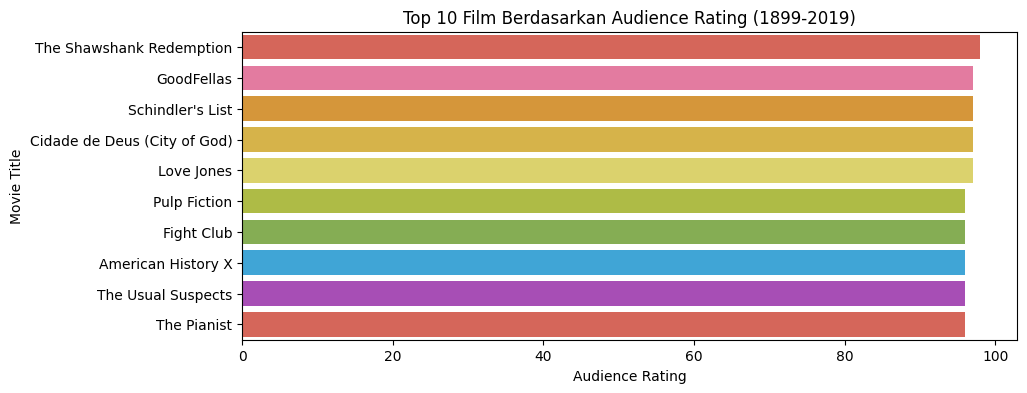

In [845]:
'''Bar chart untuk film berdasarkan audience rating'''
plt.figure(figsize=(10,4))
sns.barplot(data=df_sorted_audience.head(10), x='audience_rating', y='movie_title', 
            palette=["#ea5545", "#f46a9b", "#ef9b20", "#edbf33", "#ede15b", "#bdcf32", "#87bc45", "#27aeef", "#b33dc6"])
plt.title('Top 10 Film Berdasarkan Audience Rating (1899-2019)')
plt.xlabel('Audience Rating')
plt.ylabel('Movie Title')
plt.show()

Insight : 
Dari sini saya dapatkan 10 film terbaik di rentang tahun release 1989 sampai 2019 dimana audience rating minimal adalah 2500 orang.
Film-film ini bisa kita rekomendasikan ke client saya untuk dibeli atau disewa. Lalu kalau mau cari lebih banyak tinggak tambahkan saya 10 terbaik lagi dibawahnya, dan seterusnya.

In [846]:
'''Menampilkan film yang dirating oleh kritikus dengan jumlah yang rating >= 50 orang'''
df_sorted_kritikus.head(10)

,movie_title,tomatometer_rating,tomatometer_count
10899,Paddington 2,100,235
8825,Leave No Trace,100,220
15415,Toy Story 2,100,169
9462,Man on Wire,100,158
13474,Taxi to the Dark Side,100,93
15414,Toy Story,100,88
8564,Knock Down the House,100,86
6577,GETT: The Trial of Viviane Amsalem,100,77
5094,Deliver Us from Evil,100,72
16022,Waste Land,100,71


/var/folders/lt/mry2bd690g39fx99l_453m8c0000gn/T/ipykernel_1037/3147939534.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted_kritikus.head(10), x='tomatometer_rating', y='movie_title',


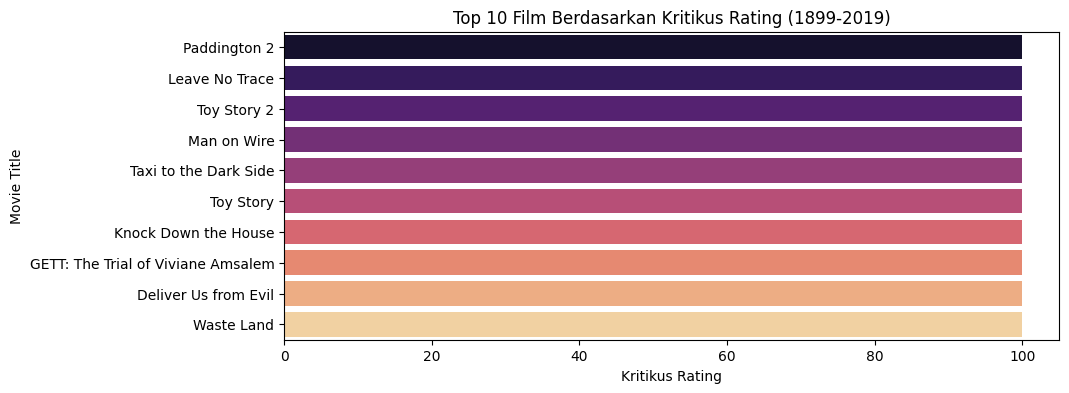

In [847]:
'''Bar chart untuk film berdasarkan tomatometer rating atau kritikus rating'''
plt.figure(figsize=(10,4))
sns.barplot(data=df_sorted_kritikus.head(10), x='tomatometer_rating', y='movie_title', 
            palette='magma')
plt.title('Top 10 Film Berdasarkan Kritikus Rating (1899-2019)')
plt.xlabel('Kritikus Rating')
plt.ylabel('Movie Title')
plt.show()

Insight : 
Dari diagram diatas saya mendapatkan 10 film dengan kritikus rating terbaik dari tahun 1899 - 2019. Data ini bisa saya rekomendasikan kepada client saya yaitu Platform Streaming Online untuk dibeli atau disewa

## 5.2  Studio mana yang memproduksi paling banyak film yang dari tahun 1989 sampai 2019?

In [848]:
'''Menghitung film yang dibuat per_studio tanpa Unknown'''
filtered_df1 = df_v3[df_v3['studio_name'] != 'Unknown']
studio_counts = filtered_df1['studio_name'].value_counts()
studio_counts.head(10)

studio_name
IFC Films                           396
Warner Bros. Pictures               373
Universal Pictures                  358
20th Century Fox                    337
Sony Pictures Home Entertainment    276
Paramount Pictures                  268
Netflix                             259
Sony Pictures Classics              258
Magnolia Pictures                   250
Warner Home Video                   181
Name: count, dtype: int64

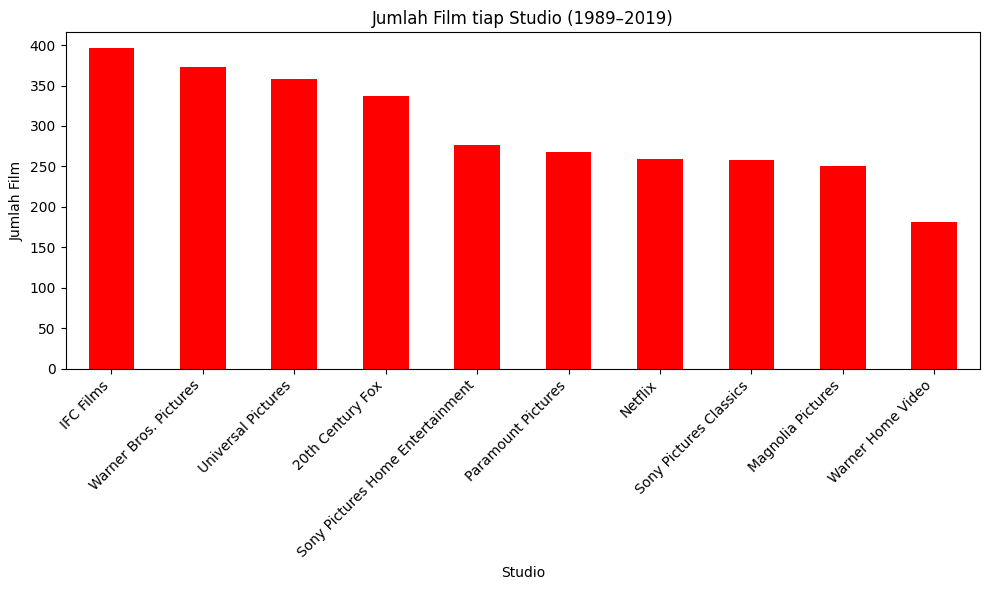

In [849]:
'''Menunjukan diagram jumlah film yang di produksi oleh studio tanpa "Unknown" '''

plt.figure(figsize=(10, 6))
studio_counts.head(10).plot(kind='bar', color='red')

plt.title('Jumlah Film tiap Studio (1989–2019)')
plt.xlabel('Studio')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Insight : 
Kita mendapatkan 10 studio film dengan film paling banyak, ini bisa jadi acuan untuk membeli film berdasarkan nama studio film. Karena bisa jadi ada orang yang orientasinya berdasarkan studio film, contohnya kritikus-kritikus.

## 5.3 Bagaimana tren genre film dari tahun 1989 sampai 2019?

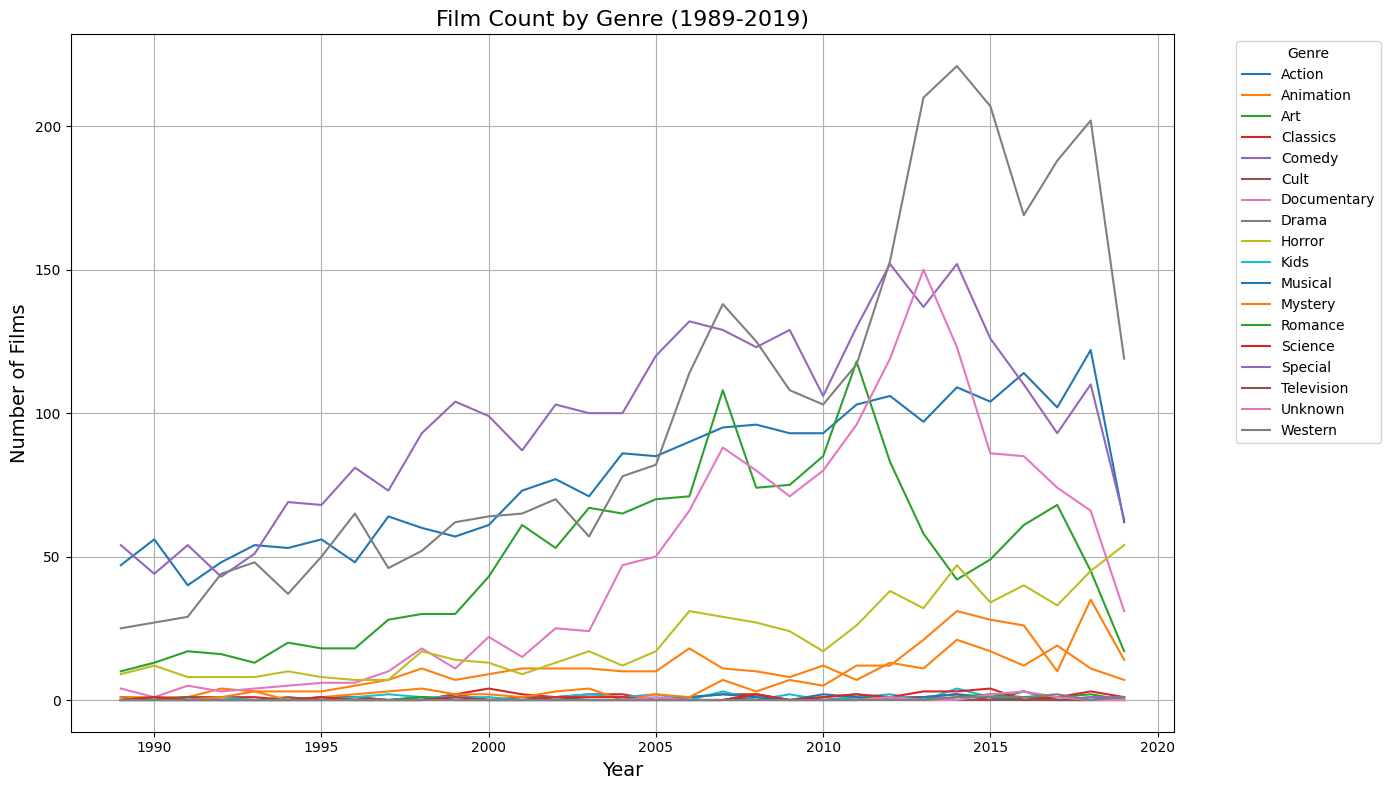

In [850]:
'''Hitung Jumlah Genre Pertahun'''
film_counts = df_v3.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

'''memastikan tahun 1989 sampai 2019'''
all_years = pd.Index(range(1989, 2020))
film_counts = film_counts.reindex(all_years, fill_value=0)

# Plot grafik garis
plt.figure(figsize=(14, 8))
for genre in film_counts.columns:
    plt.plot(film_counts.index, film_counts[genre], label=genre)

plt.title('Film Count by Genre (1989-2019)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Films', fontsize=14)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

Insight : 
Disini terlihat beberapa genre naik terus tajam terutama drama, action dan comedy. Genre lain juga meningkat seperti Animation dan Kids. Genre itu bisa dijadikan referensi untuk pemilihan film yang akan di beli atau di sewa

## 5.4 Siapa director yang memiliki rata-rata rating filmnya paling tinggi?

In [851]:
''' Modul melihat director denga rating film tertinggi berdasarkan audience_rating dan audience count >= 25000 orang '''
director_stats_aud = df_v3.groupby('directors').agg({
    'audience_rating': 'mean',
    'audience_count': 'sum'
}).reset_index()

director_stats_aud = director_stats_aud[director_stats_aud['audience_count'] >= 25000]

director_stats_aud = director_stats_aud.sort_values(['audience_rating', 'audience_count'], ascending=False)

director_stats_aud.head(10)

,directors,audience_rating,audience_count
2284,"Fernando Meirelles, Kátia Lund",97.000000,251959.0
6810,Theodore Witcher,97.000000,25700.0
3754,Josh Cooley,94.000000,53114.0
4222,"Lee Unkrich, Adrian Molina",94.000000,26889.0
4331,Louie Psihoyos,94.000000,25728.0
6069,"Roger Allers, Rob Minkoff",93.000000,1269333.0
7239,Wolfgang Becker,93.000000,55833.0
3810,Juan José Campanella,93.000000,28477.0
1137,Charles Ferguson (III),92.500000,37730.0
2129,Emir Kusturica,92.333333,67273.0


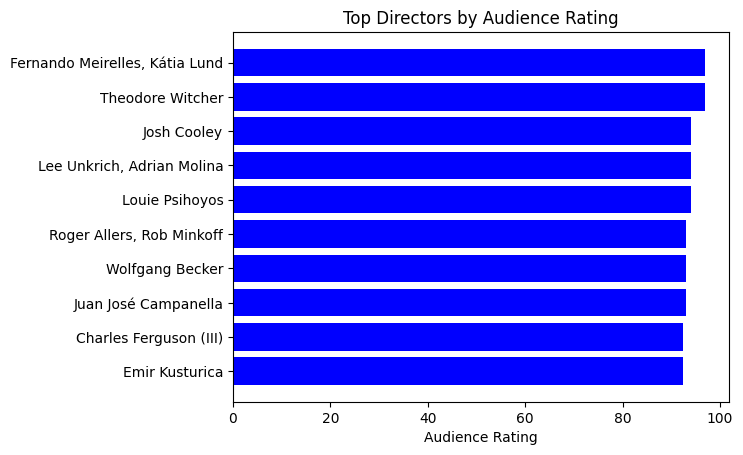

In [852]:
'''Diagram 10 besar director yang rating paling tinggi berdasarkan audience'''

top_directors_byAud = director_stats_aud.sort_values('audience_rating', ascending=False).head(10)

plt.barh(top_directors_byAud['directors'], top_directors_byAud['audience_rating'], color='blue', )
plt.gca().invert_yaxis()
plt.xlabel('Audience Rating')
plt.title('Top Directors by Audience Rating')
plt.show()

Insight :
Disini saya dapatkan ada 10 directors dengan rating paling dengan minimal jumlah orang yang merating filmnya 25000 orang. Ini bisa jadi rekomendasi untuk client kita, jadi bukan berdasarkan nama film saja tapi juga berdasarkan top directors

In [853]:
''' Modul melihat director dengan rating film tertinggi berdasarkan tomatometer_rating dan tomatometer count >= 50 orang '''
director_stats_crit = df_v3.groupby('directors').agg({
    'tomatometer_rating': 'mean',
    'tomatometer_count': 'sum'
}).reset_index()

director_stats_crit = director_stats_crit[director_stats_crit['tomatometer_count'] >= 50]

director_stats_crit = director_stats_crit.sort_values(['tomatometer_rating', 'tomatometer_count'], ascending=False)

director_stats_crit.head(10)

,directors,tomatometer_rating,tomatometer_count
3512,John Lasseter,100.0,257
5713,Rachel Lears,100.0,86
6424,"Shlomi Elkabetz, Ronit Elkabetz",100.0,77
4358,"Lucy Walker, João Jardim, Karen Harley",100.0,71
3203,Jehane Noujaim,100.0,68
2682,Havana Marking,100.0,62
6236,Sandi Tan,100.0,61
4305,Lixin Fan,100.0,54
811,Bo Burnham,99.5,317
2603,Greta Gerwig,99.0,379


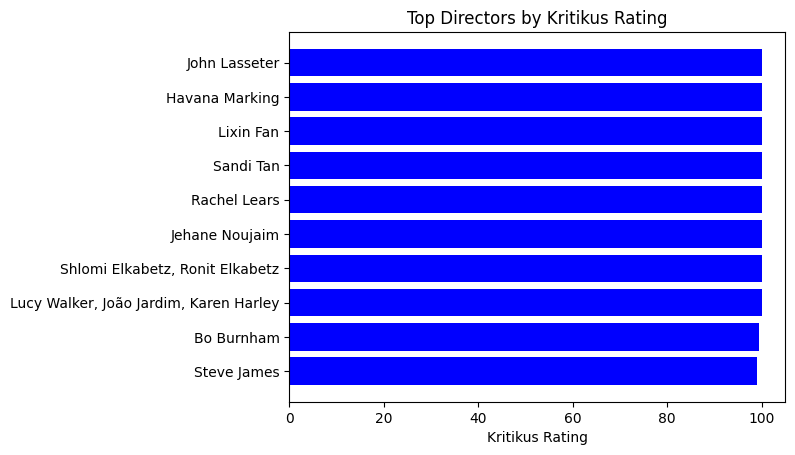

In [854]:
'''Diagram 10 besar director yang rating paling tinggi berdasarkan kritikus'''

top_directors_byCrit = director_stats_crit.sort_values('tomatometer_rating', ascending=False).head(10)

plt.barh(top_directors_byCrit['directors'], top_directors_byCrit['tomatometer_rating'], color='blue', )
plt.gca().invert_yaxis()
plt.xlabel('Kritikus Rating')
plt.title('Top Directors by Kritikus Rating')
plt.show()

Insight :
Disini saya mendapatkan 10 top director yang bisa direkomendasikan untuk client saya berdasarkan kritikus rating, jadi bukan cuma berdasarkan rating filmnya.

## 5.5 Berapa rata-rata, modus dan median durasi film dari tahun 1989 sampai 2019?

### a. Menghitung rata-rata dan nilai tengah dari durasi film

In [859]:
'''cek rata-rata durasi film keseluruhan'''
ratarata_durasifilm = df_v3['runtime_in_minutes'].mean()
print(f'rata-rata durasi film dari tahun 1989 ke 2019 adalah : {ratarata_durasifilm:.2f}')

'''cek nilai tengah dari durasi film keseluruhan'''
nilaitengah_durasifilm = df_v3['runtime_in_minutes'].median()
print(f'nilai tengah durasi film dari tahun 1989 ke 2019 adalah : {nilaitengah_durasifilm:.2f}')


rata-rata durasi film dari tahun 1989 ke 2019 adalah : 101.60
nilai tengah durasi film dari tahun 1989 ke 2019 adalah : 98.00


Insight : Melihat dari mean dan median yang tidak jauh beda berarti tidak ada outlier dan bisa diambil kesimpulan rata-rata menit film yang di tonton adalah 101 menit

## 5.6 Apakah durasi film pendek dan durasi film panjang mempengaruhi rating penonton?

### 5.6.1 Hipotesis 
Hipotesis yang tepat untuk pertanyaan ini adalah  

- H0 = Tidak ada hubungan yang signifikan antara durasi film (pendek maupun panjang) terhadap rating penonton
- H1 = Ada hubungan yang significkan antara durasi film (pendek maupun panjang) terhadap rating penonton

### 5.6.2 Korelasi

Disini saya akan melihat apakah ada hubungan antara durasi film dan rating penonton dengan menghitung P-Value dan menggunakan metode spearman untuk perbandingannya

In [856]:
'''Filter dulu di audience countnya lebih dari 25000 supaya lebih make sense'''
filtered_duration = df_v3[df_v3['audience_count'] >= 25000].copy()

'''Tentukan threshold supaya jelas mana film panjang mana film pendek'''
threshold = 90

'''Menambah kolom durasi_kategori'''
filtered_duration['duration_category'] = filtered_duration['runtime_in_minutes'].apply(lambda x: 'Pendek' if x < threshold else 'Panjang')

'''Hitung korelasi spearman, dan p valuenya'''
corr_spearman, p_value_spearman = spearmanr(filtered_duration['runtime_in_minutes'], filtered_duration['audience_rating'])

print("Korelasi Spearman:", corr_spearman)
print("P-value:", p_value_spearman)


Korelasi Spearman: 0.3350764883962307
P-value: 2.379679734663075e-99


Insight : 
1. Korelasi Spearman 0.33
  - Nilai 0.33 menunjukkan hubungan yang positif sedang, akan tetapi durasi panjang dan pendek bukan satu-satunya faktor yang mempengaruhi rating penonton
  - H1 terpenuhi dan otomatis H0 ditolak
2. P-value 2.379679734663075e-99
  - Menunjukan hubungan ini bukan kebetulan, jadi memang ada hubungan walaupun kecil
  - Durasi film yang panjang bisa membuktikan rating audience lebih tinggi

In [ ]:
'''Export clean file ke excel untuk dibuat dashboardnya'''
df_v3.to_excel('Rotten Tomatoes Movies Clean.xlsx', index=False)

# **BAB 6 - CONCLUSION**

Dari Analasis ini bisa disimpulkan tujuan mencari preferensi film dari untuk platform streaming telah tercapai. Karena kita kita bisa melihat point-point dibawah ini telah terjawab
1. Kita bisa melihat top film berdasarkan audience rating dengan batasan audience count >= 25000, jadi data bisa lebih valid dan bisa di rekomendasikan ke client kita, yaitu online streaming platform
2. Kita bisa juga melihat top film berdasarkan kritikus rating dengan batasan kritikus count >= 50, jadi kita ini juga bisa jadi patokan untuk di rekomendasi ke client
3. Kita juga bisa merekemendasikan film berdasarkan top genre yang naik terus dari tahun 1989 - 2019 kepada client
4. Kita juga bisa merekomendasikan film berdasarkan top director yang difilter berdasarkan top audience rating dengan minimal 25000 orang yang vote
5. Kita bisa merekomendasikan film berdasarkan top director yang difilter berdasarkan top kritikus dengan minimal 50 kritikus yang voting
6. Kita juga bisa melihat berdasarkan studio mana yang memproduksi banyak film, dimana bisa jadi acuan karena bisa saya orang mencari berdasark nama studio yang dibuat
7. Kita disini juga bisa melihat relasi dari durasi film dengan audience rating, apakah kalau durasinya kelamaan bisa membosankan, tapi ternyata tidak, karena semakin lama durasi film, rating semakin tinggi walaupun kemungkinannya kecil. Jadi balik lagi ke banyak faktor.